In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data_set = pd.read_csv("insurance.csv")
data_set.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [55]:
data_set.info() #There is no null value.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
data_set.drop(["region"], axis=1,inplace=True)

In [57]:
for i in range(len(data_set)):
    
#Changes Male-> 1 Female -> 0 for smokers
    if data_set['sex'][i] == 'male':
        data_set['sex'][i] = 1
    else:
        data_set['sex'][i]=0

# Changes yes-> 1 no -> 0 for smokers-
    if data_set['smoker'][i]=="yes":
        data_set['smoker'][i] =1
    else:
        data_set['smoker'][i]=0

data_set.head(10)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


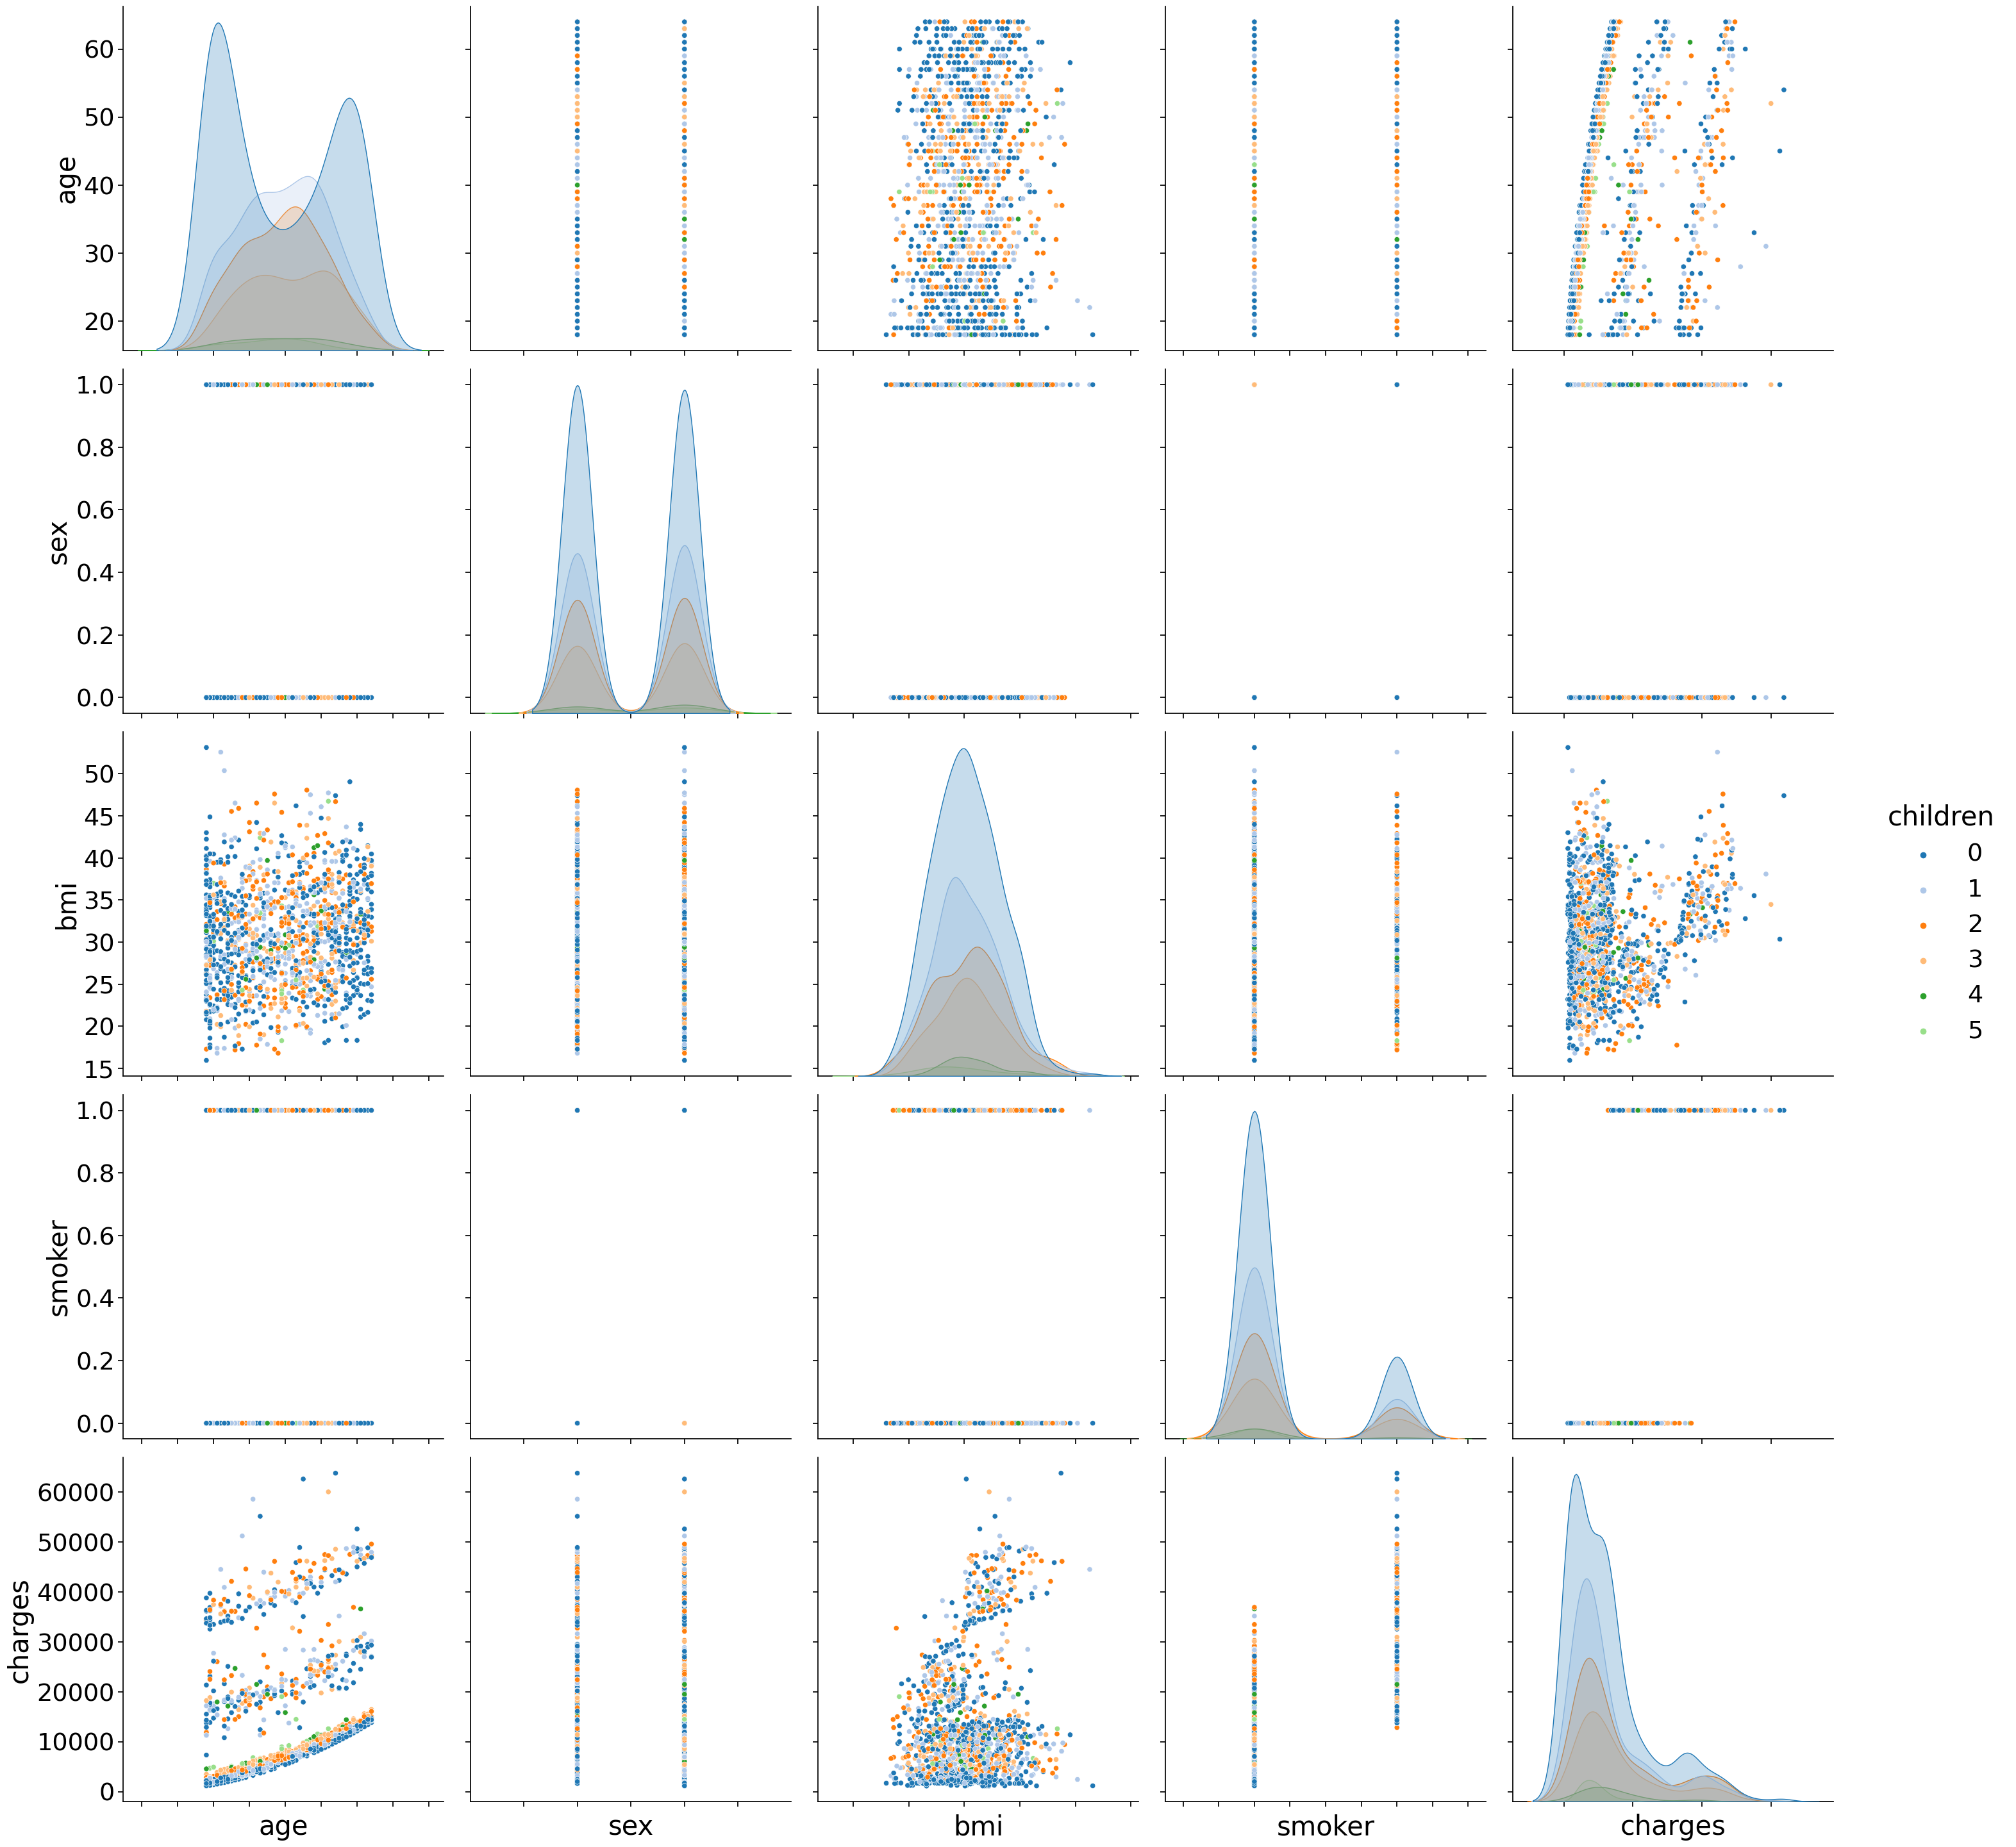

In [58]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data_set[['age','sex','bmi','children','smoker','charges']], 
                hue='children', palette='tab20',size=6)
g.set(xticklabels=[])

In [59]:
x = (data_set - np.min(data_set))/(np.max(data_set)- np.min(data_set)).values
x

,age,sex,bmi,children,smoker,charges
0,0.021739,0.0,0.321227,0.0,1.0,0.251611
1,0.0,1.0,0.47915,0.2,0.0,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.33301
4,0.304348,1.0,0.347592,0.0,0.0,0.043816
...,...,...,...,...,...,...
1333,0.695652,1.0,0.40382,0.6,0.0,0.151299
1334,0.0,0.0,0.429379,0.0,0.0,0.017305
1335,0.0,0.0,0.562012,0.0,0.0,0.008108
1336,0.065217,0.0,0.26473,0.0,0.0,0.014144


In [60]:
from sklearn.model_selection  import train_test_split
y = data_set["charges"]
X = data_set.iloc[:,0:5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1204, 5) (134, 5) (1204,) (134,)


In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

lr.score(X_train,y_train)*100

74.82776178297046